In [22]:

# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from scipy import ndimage

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [15]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

In [16]:
def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 5% change in download progress.
    """
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()

        last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    dest_filename = os.path.join(data_root, filename)
    if force or not os.path.exists(dest_filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    statinfo = os.stat(dest_filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', dest_filename)
    else:
        raise Exception(
          'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
    return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Attempting to download: notMNIST_large.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified .\notMNIST_large.tar.gz
Attempting to download: notMNIST_small.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified .\notMNIST_small.tar.gz


In [17]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

.\notMNIST_large already present - Skipping extraction of .\notMNIST_large.tar.gz.
['.\\notMNIST_large\\A', '.\\notMNIST_large\\B', '.\\notMNIST_large\\C', '.\\notMNIST_large\\D', '.\\notMNIST_large\\E', '.\\notMNIST_large\\F', '.\\notMNIST_large\\G', '.\\notMNIST_large\\H', '.\\notMNIST_large\\I', '.\\notMNIST_large\\J']
.\notMNIST_small already present - Skipping extraction of .\notMNIST_small.tar.gz.
['.\\notMNIST_small\\A', '.\\notMNIST_small\\B', '.\\notMNIST_small\\C', '.\\notMNIST_small\\D', '.\\notMNIST_small\\E', '.\\notMNIST_small\\F', '.\\notMNIST_small\\G', '.\\notMNIST_small\\H', '.\\notMNIST_small\\I', '.\\notMNIST_small\\J']


In [18]:
# We can display images using Image(filename="")
Image(filename="notMNIST_small/A/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png")

In [19]:
# We get all file names
fn = os.listdir("notMNIST_small/A/")
fn

['MDEtMDEtMDAudHRm.png',
 'MDRiXzA4LnR0Zg==.png',
 'MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png',
 'MlJlYmVsc0RldXgtQmxhY2sub3Rm.png',
 'MlRvb24gU2hhZG93LnR0Zg==.png',
 'MlRvb24yIFNoYWRvdy50dGY=.png',
 'MTAuMTUgU2F0dXJkYXkgTmlnaHQgQlJLLnR0Zg==.png',
 'MTFTMDEgQmxhY2sgVHVlc2RheSBPZmZzZXQudHRm.png',
 'MTggSG9sZXMgQlJLLnR0Zg==.png',
 'MTh0aENlbnR1cnkudHRm.png',
 'MTIgV2FsYmF1bSBJdGFsaWMgMTMyNjMudHRm.png',
 'MTJTYXJ1WWVsbG93Rm9nLnR0Zg==.png',
 'Nng3b2N0IEFsdGVybmF0ZSBFeHRyYUxpZ2h0LnR0Zg==.png',
 'Nng3b2N0IEFsdGVybmF0ZSBSZWd1bGFyLnR0Zg==.png',
 'NXRoR3JhZGVyLnR0Zg==.png',
 'OC1iaXQgTGltaXQgTyBCUksudHRm.png',
 'OEJhbGxTY3JpcHRTQ2Fwc1NTSyBJdGFsaWMudHRm.png',
 'OTExIFBvcnNjaGEgSXRhbGljLnR0Zg==.png',
 'OXNxZ3JkIFRoaW4udHRm.png',
 'Q09ERTNYLnR0Zg==.png',
 'Q0cgT21lZ2EudHRm.png',
 'Q0NDb21pY3JhenktQm9sZEl0YWxpYy50dGY=.png',
 'Q0NTcG9va3l0b290aC1SZWd1bGFyLnR0Zg==.png',
 'Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png',
 'Q0sgUGluay50dGY=.png',
 'Q1FOLU1vbGVjdWxhci1EeW5hbW8tUmVndWxhci5vdGY=.png',
 'Q290cmFu

In [20]:
# Display first 20 images 
for file in fn[:20]:
    path = 'notMNIST_small/A/' + file
    display(Image(path))

In [23]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling .\notMNIST_large\A.pickle.
.\notMNIST_large\A


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


Could not read: .\notMNIST_large\A\RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file '.\\notMNIST_large\\A\\RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png' - it's ok, skipping.
Could not read: .\notMNIST_large\A\SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file '.\\notMNIST_large\\A\\SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png' - it's ok, skipping.
Could not read: .\notMNIST_large\A\Um9tYW5hIEJvbGQucGZi.png : cannot identify image file '.\\notMNIST_large\\A\\Um9tYW5hIEJvbGQucGZi.png' - it's ok, skipping.
Full dataset tensor: (52909, 28, 28)
Mean: -0.12825024
Standard deviation: 0.44312063
Pickling .\notMNIST_large\B.pickle.
.\notMNIST_large\B
Could not read: .\notMNIST_large\B\TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : cannot identify image file '.\\notMNIST_large\\B\\TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png' - it's ok, skipping.
Full dataset tensor: (52911, 28, 28)
Mean: -0.0075630303
Standard deviation: 0.45449105
Pickling .\notMNIST_large\C.pickle.
.\n

In [28]:
import pickle

# Create a list
test_values = ['test value','test value 2','test value 3']
display(test_values)

file_Name = "testfile"
# Open the file for writing
fileObject = open(file_Name,'wb') 

# This writes the object a to the
# file named 'testfile'
pickle.dump(test_values, fileObject)   

# Then we close the fileObject
fileObject.close()

# We then open the file for reading
fileObject = open(file_Name,'rb')  

# And the object from the file into var b
test_values_loaded = pickle.load(fileObject) 
display(test_values_loaded)
display(test_values == test_values_loaded)

['test value', 'test value 2', 'test value 3']

['test value', 'test value 2', 'test value 3']

True

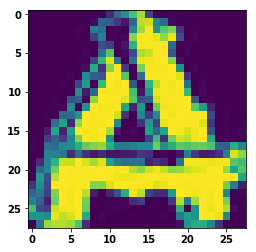

In [29]:
# index 0 should be all As, 1 = all Bs, etc.
pickle_file = train_datasets[0]  

# With would automatically close the file after the nested block of code
with open(pickle_file, 'rb') as f:
    
    # unpickle
    letter_set = pickle.load(f)  
    
    # pick a random image index
    sample_idx = np.random.randint(len(letter_set))
    
    # extract a 2D slice
    sample_image = letter_set[sample_idx, :, :]  
    plt.figure()
    
    # display it
    plt.imshow(sample_image)  

In [31]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [32]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [33]:

pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [34]:
# Getting statistics of a file using os.stat(file_name)
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800506


Number of duplicates in test dataset: 1779


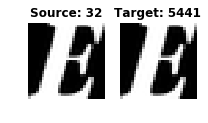

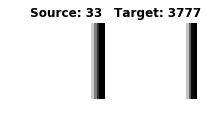

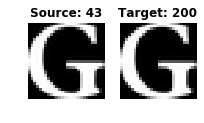

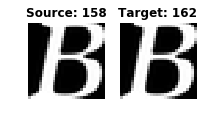

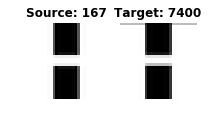

In [36]:

def get_duplicate_data(source_dataset, target_dataset, threshold=1, num_duplicate_to_show=0):
    X = source_dataset.reshape(source_dataset.shape[0], -1)
    Y = target_dataset.reshape(target_dataset.shape[0], -1)
    assert(X.shape[1] == Y.shape[1])
    
    dim = X.shape[1]
    cosine_sim = np.inner(X, Y) / np.inner(np.abs(X), np.abs(Y))
    assert(cosine_sim.shape == (X.shape[0], Y.shape[0]))
    
    # for each image in training set, find corresponding duplicate in test/valid set
    dup_target_indices = []
    show_duplicate_counter = 0
    for source_idx in range(cosine_sim.shape[0]):
        dup_indices = list(np.where(cosine_sim[source_idx, :] >= threshold)[0])
    
        # render duplicate images when is available. may omit if visual output is not required
        if dup_indices and num_duplicate_to_show and (show_duplicate_counter < num_duplicate_to_show):
            # show only non-redudent duplicate images
            for i in dup_indices:
                if i in dup_target_indices:
                    dup_indices.remove(i)
            if not dup_indices: continue
            
            if len(dup_indices) == 1:
            
                fig = plt.figure(figsize=(3, 15))
                fig.add_subplot(1, len(dup_indices) + 1, 1)
                plt.imshow(source_dataset[source_idx, :, :], cmap='gray')
                plt.title('Source: ' + str(source_idx))
                plt.axis('off')
            
            
                for i, target_idx in enumerate(dup_indices):
                    fig.add_subplot(1, len(dup_indices) + 1, i + 2)
                    plt.imshow(target_dataset[target_idx, :, :], cmap='gray')
                    plt.title('Target: ' + str(target_idx))
                    plt.axis('off')

                show_duplicate_counter += 1
        
        dup_target_indices.extend(dup_indices)
    return list(set(dup_target_indices))
        
    
dup_indices_test = get_duplicate_data(train_dataset, test_dataset, num_duplicate_to_show=5)
print('Number of duplicates in test dataset: {}'.format(len(dup_indices_test)))

Number of duplicates in validation dataset: 1481


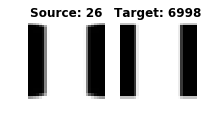

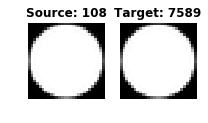

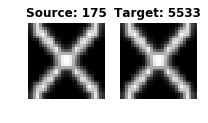

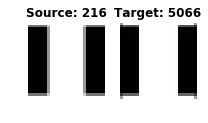

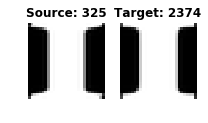

In [38]:
dup_indices_valid = get_duplicate_data(train_dataset, valid_dataset, num_duplicate_to_show=5)
print('Number of duplicates in validation dataset: {}'.format(len(dup_indices_valid)))

In [39]:
print("Number of duplicate images in test set: {}".format(len(dup_indices_test)))
print("Number of duplicate images in valid set: {}".format(len(dup_indices_valid)))

Number of duplicate images in test set: 1779
Number of duplicate images in valid set: 1481


In [40]:
non_duplicate_indices = [i for i in range(test_dataset.shape[0]) if not i in dup_indices_test]
sanitized_test_dataset = test_dataset[non_duplicate_indices, :, :]
sanitized_test_labels = test_labels[non_duplicate_indices]

non_duplicate_indices = [i for i in range(valid_dataset.shape[0]) if not i in dup_indices_valid]
sanitized_valid_dataset = valid_dataset[non_duplicate_indices, :, :]
sanitized_valid_labels = valid_labels[non_duplicate_indices]

In [41]:
pickle_file = os.path.join(data_root, 'notMNIST_sanitized.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': sanitized_valid_dataset,
    'valid_labels': sanitized_valid_labels,
    'test_dataset': sanitized_test_dataset,
    'test_labels': sanitized_test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [42]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 680564106


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

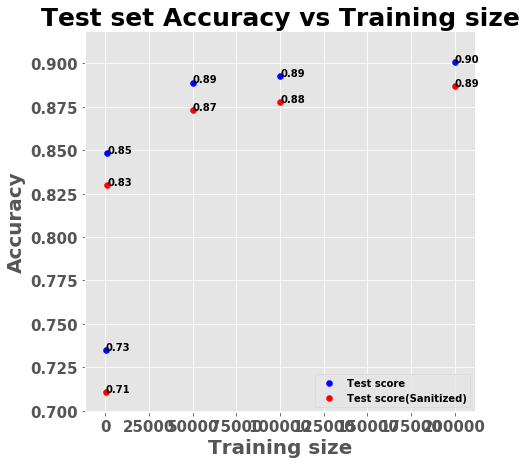

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
np.random.seed(42)
train_sizes = [100, 1000, 50000, 100000, 200000]

# train models using different size of training set
test_scores, test_scores_sanitized = [[] for _ in range(2)]
for train_size in train_sizes:
    # random choose #train_size of training instances
    indices = np.random.randint(0, train_dataset.shape[0], train_size)
    
    # reshape images to (train_size, dim * dim) for easier processing
    X = train_dataset[indices, :, :]\
        .reshape(-1, train_dataset.shape[1] * train_dataset.shape[2])
    y = train_labels[indices]
        
    # train model
    clf = (LogisticRegression(random_state=10, solver='lbfgs', multi_class='multinomial')
                  .fit(X, y))
    
    # test on original test set and the sanitized one
    y_pred = clf.predict(test_dataset.reshape(test_dataset.shape[0], -1))
    y_pred_sanitized = clf.predict(sanitized_test_dataset.reshape(sanitized_test_dataset.shape[0], -1))

    test_score = accuracy_score(y_pred, test_labels)
    test_score_sanitized = accuracy_score(y_pred_sanitized, sanitized_test_labels)
    test_scores.append(test_score)
    test_scores_sanitized.append(test_score_sanitized)

    
    
#     print(classification_report(test_labels, y_pred))
#     print(accuracy_score(test_labels, y_pred))

    
plt.figure(figsize=(7, 7))
plt.xlabel('Training size', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for x, y in zip(train_sizes, test_scores):
    plt.text(x + 50, y, '{:.2f}'.format(y))
for x, y in zip(train_sizes, test_scores_sanitized):
    plt.text(x + 50, y, '{:.2f}'.format(y))
    
plt.scatter(train_sizes, test_scores, label='Test score', color='blue');
plt.scatter(train_sizes, test_scores_sanitized, label='Test score(Sanitized)', color='red');
plt.legend(loc=4)
plt.title('Test set Accuracy vs Training size', fontsize=25);

Deep Learning
Assignment 2

In [54]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

In [116]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [117]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


In [119]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 10000

graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation and test data into constants that are
  # attached to the graph.
  tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
  tf_train_labels = tf.constant(train_labels[:train_subset])
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random values following a (truncated)
  # normal distribution. The biases get initialized to zero.
  weights = tf.Variable(
    tf.random.truncated_normal([image_size * image_size, num_labels]))
  biases = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the softmax and cross-entropy (it's one operation in TensorFlow, because
  # it's very common, and it can be optimized). We take the average of this
  # cross-entropy across all training examples: that's our loss.
  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=tf_train_labels))
  #cross_entropy2=tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits, y_))#dont forget tf.reduce_sum()!!
  #cross_entropy = -tf.reduce_sum(y_*tf.log(y))
  # Optimizer.
  # We are going to find the minimum of this loss using gradient descent.
  optimizer = tf.optimizers.SGD(0.5).minimize(loss)

  
  # Predictions for the training, validation, and test data.
  # These are not part of training, but merely here so that we can report
  # accuracy figures as we train.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases)
  test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

TypeError: softmax_cross_entropy_with_logits_v2() got an unexpected keyword argument 'y'

In [92]:
num_steps = 801

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.compat.v1.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.initializers.truncated_normal.run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions = session.run([optimizer, loss, train_prediction])
    if (step % 100 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, train_labels[:train_subset, :]))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

AttributeError: module 'tensorflow.python.keras.api._v2.keras.initializers' has no attribute 'truncated_normal'

'2.0.0-alpha0'